Text(0.5, 1.0, 'Pareto dominance in two dimensions')

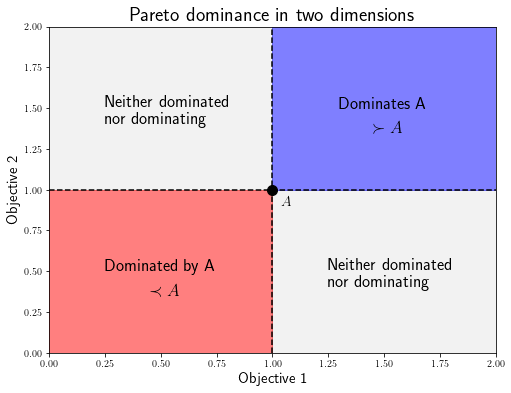

In [88]:
from matplotlib import pyplot as plt
plt.rcParams.update({ "text.usetex": True })
    
plt.figure(figsize=(8, 6))
plt.plot([1.0], [1.0], marker='o', markersize=10, color='black')
plt.annotate("$A$", (1.04, 0.9), fontsize='x-large')
plt.axvline(1.0, linestyle='dashed', color='black')
plt.axhline(1.0, linestyle='dashed', color='black')
plt.annotate("Dominates A", (1.3, 1.5), fontsize='xx-large')
plt.annotate("$\succ A$", (1.45, 1.35), fontsize='xx-large')
plt.annotate("$\prec A$", (0.45, 0.35), fontsize='xx-large')
plt.annotate("Neither dominated\nnor dominating", (0.25, 1.4), fontsize='xx-large')
plt.annotate("Neither dominated\nnor dominating", (1.25, 0.4), fontsize='xx-large')
plt.annotate("Dominated by A", (0.25, 0.5), fontsize='xx-large')
plt.axvspan(0, 1.0, ymin=0, ymax=0.5, alpha=0.5, color='red')
plt.axvspan(1.0, 2.0, ymin=0.5, ymax=1.0, alpha=0.5, color='blue')
plt.axvspan(1.0, 2.0, ymin=0, ymax=0.5, alpha=0.1, color='gray')
plt.axvspan(0, 1.0, ymin=0.5, ymax=1.0, alpha=0.1, color='gray')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("Objective 1", fontsize=15)
plt.ylabel("Objective 2", fontsize=15)
plt.title("Pareto dominance in two dimensions", fontsize=20)

In [92]:
from operator import itemgetter

l = [('a', 15), ('b', 12), ('c', 1), ('e', 21), ('d', 21)]
sorted(l, key=itemgetter(1))

[('c', 1), ('b', 12), ('a', 15), ('e', 21), ('d', 21)]

In [95]:
l.sort(key=itemgetter(1))
l

[('c', 1), ('b', 12), ('a', 15), ('d', 21), ('e', 21)]

In [20]:
import toolz

from leap_ec.individual import Individual
from leap_ec.real_rep.problems import SpheroidProblem

problem = SpheroidProblem(maximize=True)


pop = [ Individual([ 1, 2, 3, 4 ], problem=problem),
        Individual([ 1, 2, 3 ], problem=problem),
        Individual([ 1, 4 ], problem=problem),
        Individual([ 1, 2, 3, 4, 5 ], problem=problem) ]
pop[0].fitness = 0.4
pop[1].fitness = 1.0
pop[2].fitness = 0.4
pop[3].fitness = 0.4

pop = iter(pop)

toolz.topk(2, pop, key=lambda x: (x.fitness, -len(x.genome)))

# Result:
# (Individual([1, 2, 3], None, <leap_ec.real_rep.problems.SpheroidProblem object at 0x7f71fb61a220>),
#  Individual([1, 4], None, <leap_ec.real_rep.problems.SpheroidProblem object at 0x7f71fb61a220>))

(Individual([1, 2, 3], None, <leap_ec.real_rep.problems.SpheroidProblem object at 0x7f71fb61a220>),
 Individual([1, 4], None, <leap_ec.real_rep.problems.SpheroidProblem object at 0x7f71fb61a220>))

In [18]:
(4, 5) > (4, 4)

True

In [30]:
from toolz import curry

@curry
def f(a, *, b, c):
    print(f"{a}, {b}, {c}")
    
g = f("one", b="two")

g

<function f at 0x7f71fb60a790>

In [290]:
import random

import sympy as sp


def get_expression(num_symbols=5):
    variables = ['x', 'y']
    operations = [ f"*{v}" for v in variables] + [ f" + {v}" for v in variables ]

    expr = [ random.choice(variables) ] + [ random.choice(operations) for i in range(num_symbols) ]
    expr = sp.sympify(''.join(expr))
    return expr, expr.factor()

In [201]:
expr, factored = get_expression(14)
display(expr)
display(factored)
expr == factored

x**4*z**2 + 2*x*y + x + y*z + 2*z

x**4*z**2 + 2*x*y + x + y*z + 2*z

True

In [205]:
def estimate_factorable(num_symbols, N=1000):
    expressions = [ get_expression(num_symbols) for i in range(N) ]
    different = sum([ expr != factored for expr, factored in expressions ])
    return different/N*100

x = list(range(15))
y = [ estimate_factorable(xx) for xx in x ]

Text(0.5, 0, 'Number of Symbols')

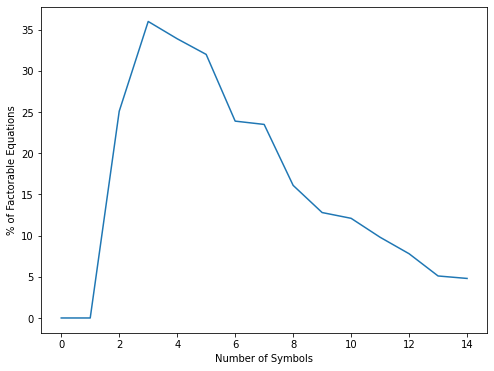

In [206]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.ylabel('% of Factorable Equations')
plt.xlabel('Number of Symbols')

In [291]:
from functools import reduce
from operator import mul

def build_expression():
    expressions = [ get_expression(random.choice([1, 2, 3, 4])) for _ in range(3)]
    expressions = [ factored for _, factored in expressions ]
    expr = reduce(mul, expressions)
    return expr

In [293]:
for i in range(10):
    display(build_expression())

y**2*(x + y)*(x**2 + y)

x**2*y*(x + 1)*(x**2 + x*y + y)

x*(x + y**2)*(y + 1)*(y**2 - y + 1)*(x*y + x + y)

4*x**4*y

x**2*y**2*(y + 1)*(x**2*y + x + y)

x*y**3*(x + 1)**2

y*(x + y)*(x**2 + 1)*(x*y + 2*x + y)

x*y*(x + y**2 + y)*(x**3 + x + y)

y**2*(2*x + y)*(x**2 + y**2)

2*y**4*(x + y)

In [294]:
def estimate_factorable(N=1000):
    expressions = [ build_expression() for i in range(N) ]
    different = sum([ expr != expr.factor() for expr in expressions ])
    return different/N*100

estimate_factorable()

0.0

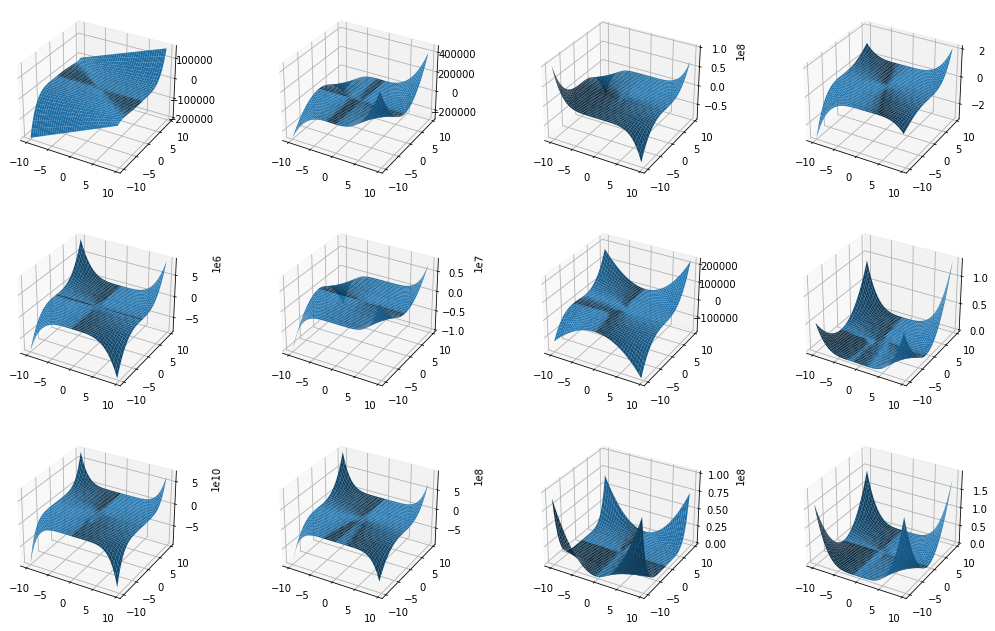

In [356]:
from functools import reduce
from operator import mul
import random

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sp


def get_expression(num_symbols=5):
    variables = ['x', 'y']
    operations = [ f"*{v}" for v in variables] + [ f" + {v}" for v in variables ]

    expr = [ random.choice(variables) ] + [ random.choice(operations) for i in range(num_symbols) ]
    expr = sp.sympify(''.join(expr))
    return expr, expr.factor()


def build_expression():
    expressions = [ get_expression(random.choice([1, 2, 3, 4])) for _ in range(3)]
    expressions = [ factored for _, factored in expressions ]
    expr = reduce(mul, expressions)
    return expr



x = np.arange(-10, 10, 0.5)
y = np.arange(-10, 10, 0.5)
xx, yy = np.meshgrid(x, y)
plt.figure(figsize=(18,15))

for row in range(3):
    for col in range(4):
        f = sp.lambdify('x, y', build_expression())
        zz = f(xx, yy)
        ax = plt.subplot(4, 4, (row + 1)*4 + col + 1, projection='3d')
        ax.plot_surface(xx, yy, zz)

In [399]:
import sys, os
import toolz

from leap_ec.individual import Individual
from leap_ec.binary_rep.ops import mutate_bitflip
import leap_ec.ops as ops

pop = []

pop.append(Individual([0, 0]))
pop.append(Individual([0, 0]))
pop.append(Individual([0, 0]))

pop

[Individual([0, 0], None, None),
 Individual([0, 0], None, None),
 Individual([0, 0], None, None)]

In [406]:
new_pop = toolz.pipe(iter(pop),
                     mutate_bitflip(expected_num_mutations=2),
                     pool_all)
list(new_pop)

[Individual([1, 1], None, None),
 Individual([1, 1], None, None),
 Individual([1, 1], None, None)]

In [387]:
list(new_pop)

[Individual([1, 1], None, None),
 Individual([1, 1], None, None),
 Individual([1, 1], None, None)]

In [397]:
def pool_all(next_individual):
    pool = []
    while True:
        try:
            x = next(next_individual)
            pool.append(x)
        except RuntimeError:
            return pool

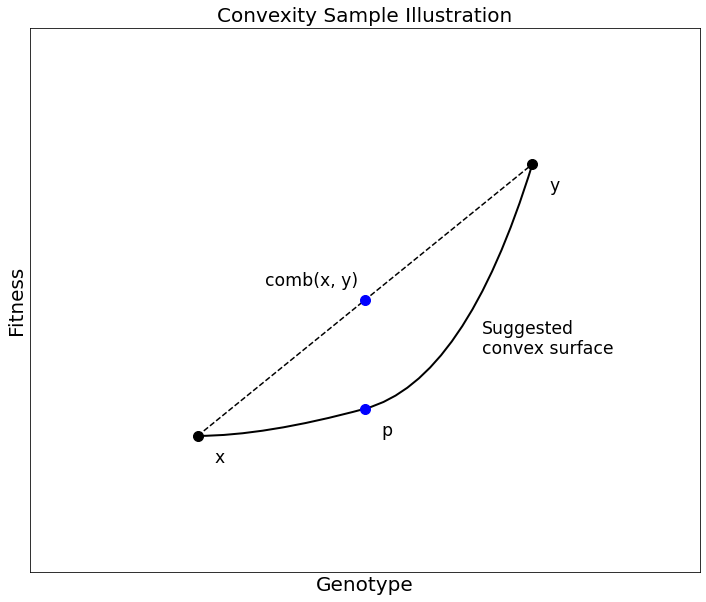

In [24]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
    
plt.figure(figsize=(12, 10))

# Line
plt.plot([1.0, 2.0], [1.0, 2.0], marker='o', markersize=10, color='black', linestyle='dashed')
plt.annotate("x", (1.05, 0.9), fontsize='xx-large')
plt.annotate("y", (2.05, 1.9), fontsize='xx-large')

# Convex combination
plt.plot([1.5], [1.5], marker='o', markersize=10, color='blue')
plt.annotate("comb(x, y)", (1.2, 1.55), fontsize='xx-large')

# Third point
plt.plot([1.5], [1.1], marker='o', markersize=10, color='blue')
plt.annotate('p', (1.55, 1.0), fontsize='xx-large')

# Suggested convex surface
vertices = [
    (1.0, 1.0), # Start point
    (1.2, 1.0), # Beizer control point
    (1.5, 1.1), # Beizer midpoint
    (1.8, 1.2), # Beizer control point
    (2.0, 2.0)  # End point
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.LINETO
]

path = Path(vertices, codes)
patch = patches.PathPatch(path, facecolor='none', lw=2)
plt.gca().add_patch(patch)

plt.annotate("Suggested\nconvex surface", (1.85, 1.3), fontsize='xx-large')


plt.xlim(0.5, 2.5)
plt.ylim(0.5, 2.5)
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('Genotype', fontsize=20)
plt.ylabel('Fitness', fontsize=20)
plt.title("Convexity Sample Illustration", fontsize=20);

In [25]:
from leap_ec.decoder import IdentityDecoder
from leap_ec.individual import Individual
from leap_ec.landscape_features import exploratory
from leap_ec.representation import Representation
from leap_ec.real_rep import initializers, problems
from leap_ec.statistical_helpers import equals_gaussian


def spheroid_sample():
    """A uniform sample of individuals on the spheroid function."""
    DIMENSIONS = 10
    N_SAMPLES = 50*DIMENSIONS
    problem = problems.SpheroidProblem()

    representation = Representation(
        initialize=initializers.create_real_vector(bounds=[(-5.12, 5.12)]*DIMENSIONS)
    )

    initial_sample = representation.create_population(N_SAMPLES, problem)
    Individual.evaluate_population(initial_sample)

    return problem, representation, initial_sample

def spheroid_convex():
    """Constructs an ELAConvexity instance from samples on the spheroid.

    We made this a fixture because building ELAConexity requires some computation,
    so we want to reuse a single instance in different tests.
    """
    problem, representation, initial_sample = spheroid_sample()

    return exploratory.ELAConvexity(problem, representation, design_individuals=initial_sample)



In [26]:
num_reference_observations = 1000

x = [ spheroid_convex().linear_deviation() for _ in range(num_reference_observations) ]

In [27]:
# From R flacco
y = [ -28.4110541791358, -29.9550730657531, -28.4844251699614, -28.9587501592687, -28.7293223527567, -27.7901326661723, -29.2750583869731, -29.6126268321635, -29.7600475713711, -28.7275207559414, -29.1914651653777, -28.7071619492932, -28.9158871207482, -29.5053835715336, -28.8809390919082, -28.0175288920875, -29.6092941849741, -27.6475024293889, -30.4464059881416, -29.3031158002986, -29.1612376958239, -29.4457981657163, -29.0997956868013, -29.0095564631744, -28.655890603516, -29.7496658274603, -28.8026397735744, -29.8555577033282, -29.5563549427674, -28.8032648819393, -28.5694566508296, -28.3741389479755, -28.8069315865358, -28.8522794865262, -29.8301657058528, -28.8093680166249, -27.5206151665353, -29.5418854290385, -29.4576820355373, -29.1391952512234, -28.4373485594394, -28.5738934827459, -29.3115469549125, -29.50592204462, -28.2969247112844, -29.5506096455837, -29.9395487090976, -27.8918408275169, -29.29393179421, -28.5236087045372, -29.9487804593808, -27.996627771474, -29.2559154562743, -28.6373754403825, -29.9132577833127, -28.3240421986162, -29.3179892576277, -29.6537789831298, -28.5533476179552, -29.1223932448576, -29.749440524722, -29.0513477657763, -29.5131886980792, -29.6775376880029, -30.8245733016127, -27.3432349960077, -28.2934983067839, -29.7003709378824, -29.8105754572537, -29.121232064948, -28.4895892313888, -29.167877644797, -27.1878895933367, -28.9464352205501, -27.653168734812, -29.0371773817205, -28.4492458239214, -29.2205349264861, -29.1086173213882, -28.2007366586499, -29.4653798370667, -28.9654428602496, -27.9576185909262, -28.6694971523963, -29.0029182267206, -29.4106151797809, -28.4676646497279, -28.3449980003838, -28.8817394829451, -29.0557748528441, -27.8612236439087, -29.3541026919672, -28.5260950029143, -28.9461312382843, -30.305374703728, -28.819973839051, -29.4141862562322, -29.488623438052, -28.7719925910425, -29.2766957284299, -29.4914962576499, -27.7744827991885, -28.0397112609822, -29.9982269998734, -29.3337949581308, -28.343789977414, -29.2438436413951, -28.1927452225804, -28.578960512852, -28.8189670164715, -29.3537803130642, -28.4919301093308, -29.7518857271754, -28.009772308766, -29.6436321662651, -29.743498520502, -28.3171163629596, -28.9674251267709, -29.6059908976041, -28.7154700719032, -29.817248093843, -30.2705188475878, -28.2570581918924, -29.901747336068, -29.6061049710761, -28.0947351965125, -29.6851572989211, -28.7485443775583, -28.5776196389263, -29.5847317977321, -29.6680252646104, -28.7684933413152, -29.5304709603955, -28.3580458863596, -28.5303214503934, -28.7402723918321, -29.8649205909594, -28.9537221387847, -29.1527217551692, -28.5546605453682, -29.110393816869, -29.618199491377, -28.541804091269, -29.79614787692, -29.3706525360479, -30.6117668965317, -29.3974667344969, -29.539002891056, -27.7872205571839, -28.8671842885021, -29.2005197368512, -29.5449002233687, -29.0071512752286, -28.9476486841682, -29.6557251753631, -29.0010626809922, -28.8094206075888, -28.3438051787823, -29.701470965637, -29.6431719418914, -29.8957083686354, -29.4793704481346, -28.6843435653439, -28.5225836463391, -29.2483316784613, -28.5662390329354, -28.6529560534412, -29.1441185733793, -29.5881726611599, -29.1381119287771, -29.5047499952352, -29.9057581905396, -28.524541082935, -29.8641435930437, -29.2507325732515, -28.9725085227213, -29.4943014133443, -28.8183111548884, -28.75922279514, -28.7618377709377, -29.1264406575618, -30.3521103081233, -28.5541421632263, -29.0507387210906, -29.1275476067141, -30.58831431464, -28.894850968916, -29.9311170838476, -28.8605547500872, -29.4098081803001, -28.9817789960622, -29.5724293389022, -28.535761087121, -29.353983763872, -29.2029466397995, -29.1198404354955, -28.9704707949556, -27.9505990259969, -28.6498547018378, -28.6715286797798, -29.1774908671928, -29.0528153465865, -29.2244400774604, -28.957529013107, -30.0263764092969, -29.8493654267689, -29.5499866266262, -28.9621492213811, -28.817216359933, -29.4860497125505, -29.1675779484113, -29.4567560570301, -28.8377794390009, -29.4033804955121, -29.6204897248902, -28.001219945269, -29.0216306344088, -28.094770026891, -29.9222991640002, -30.2220645027126, -30.0090733686662, -28.3687021635069, -28.7083266851755, -30.0900999903301, -28.6825314947833, -28.4311975860683, -29.5130571762572, -28.7046249471148, -29.8032948840705, -30.1223650737707, -29.6287520199507, -29.3259207824187, -28.4138230530641, -28.6409437424734, -29.4671265962284, -29.9903859766557, -28.9494760242411, -29.2007839622454, -28.6438363514688, -28.6866954269208, -30.4006242667037, -29.3290259885752, -29.4569412893941, -28.5091537304295, -29.2553756648728, -27.6635645855001, -29.2138426159001, -29.1510428189637, -28.9202252369953, -28.711108592041, -29.7177879925767, -28.9542566500852, -29.0457543597229, -29.2073112920911, -29.0272294107534, -30.1438157881242, -28.4426618236554, -28.4726815276223, -29.2256414527759, -29.3244805686076, -28.8324777232092, -29.511735472818, -29.4302194243269, -28.8923115572583, -28.6250606489448, -28.1819027760098, -29.5443092326968, -28.473746500703, -29.1500445239865, -29.642372839076, -28.6152095718968, -28.9528270761113, -29.2982846662203, -30.1543166448411, -27.8956514778782, -28.7984706874229, -28.6762289321226, -30.1567675763248, -29.4148973267166, -28.9951054821923, -27.5594578264537, -29.8438108133019, -28.748828629847, -29.0994878287602, -30.5885303901812, -30.1081268920599, -28.1745320122408, -28.8536000082409, -30.1026217376762, -29.4478188902107, -29.9000710952819, -27.5208954035637, -29.444316592526, -28.7295875793773, -28.4021707149088, -30.4500311756082, -30.5045560158777, -29.7235201668656, -29.5636034903226, -30.4085317871338, -28.3584259212381, -29.5094149080603, -29.6495687537344, -29.8811365927755, -28.3293975808998, -28.1532602282219, -28.7537737086547, -30.0270653867999, -29.3333042205573, -28.3800291219249, -28.3666608679237, -30.0210732898494, -27.992432878523, -29.8053082949404, -27.9945417342313, -27.9240617051606, -28.4672262243478, -29.2017567130285, -28.6985077817598, -29.6446452277222, -28.0179908381077, -27.8598028939434, -26.7976788202908, -30.1876390759836, -28.8416546126323, -28.0263680040573, -29.6023183599033, -28.9603022658534, -29.9395818051511, -28.3291216312687, -29.2014296088251, -30.1376302467713, -29.7249479898874, -28.5800445177406, -28.4930528674554, -28.9914617799253, -29.70602903476, -29.8087172565184, -28.8069117730241, -29.3716580854909, -28.0798589280098, -30.0376573609733, -28.6299755285442, -28.7282825431344, -28.4686740873714, -28.831549166585, -29.4376614914307, -28.4315230446828, -28.9731665620289, -28.8423122267886, -29.6197757995205, -28.5749270779522, -28.4240599346794, -29.7569832825799, -28.004779745902, -28.991379535506, -27.6752037647137, -28.2917971990112, -29.2597743570142, -29.1228356447283, -29.5605399678429, -30.5725241643272, -28.4277935893539, -29.18656550486, -29.5142465148518, -28.2294296352104, -29.7262499240768, -29.7255848838389, -28.4900467676421, -28.5147513259735, -29.06343523037, -29.4473655202072, -28.5305048318649, -29.6981992798688, -27.7950952851114, -28.3162812540162, -29.5702468433792, -28.4563605098103, -29.4129471218623, -29.2894599214434, -29.0585927353965, -30.22032626654, -29.3258630514602, -30.4927763339906, -29.5211900007625, -29.1171943902279, -29.3204930056133, -29.2281428570737, -28.7073347662809, -28.9499195635376, -30.0663069176102, -29.8950732870835, -30.1385494421269, -28.7265615047781, -28.2557470946296, -29.4157796718849, -29.9192332815791, -29.3603775855364, -29.9835596931454, -29.1352310028227, -28.53793254793, -29.8841762958298, -29.0493868715093, -28.5103637142067, -29.6118591546242, -27.8720035221499, -27.9111859369845, -28.5292064294281, -28.9822535139229, -29.5414582021911, -29.9739212437785, -28.658432356663, -28.470306716923, -27.5933353908353, -27.7925244266095, -29.2588044092001, -28.5773164126215, -28.8089283500641, -29.1571711396528, -28.5967996852651, -28.6221582928826, -27.5451026199754, -29.5000880051497, -27.5575776533172, -29.3659099581603, -28.800120440398, -29.4617118610326, -29.3848714474255, -29.2997363682911, -29.3242627169334, -29.0418764536229, -28.6788427718437, -29.5112758214437, -28.7594096992822, -29.1212978980206, -29.0232464480643, -28.7809091831908, -29.0561268779557, -28.506390334203, -29.5235979592137, -28.8152507943391, -29.3596644234511, -28.8274981578958, -30.3675574025576, -29.6586715884047, -30.0404039362894, -28.8747206261785, -28.4569971236374, -28.0624307415349, -29.9252425747591, -29.6838272619599, -28.6459120374145, -30.564980133513, -29.3917193848544, -28.5713723392931, -30.2599069508807, -29.3929440253654, -29.6843580998838, -29.4651942125602, -29.4319663282274, -30.6028431956922, -28.61948832086, -28.3001396392279, -28.6429213511004, -27.8671682720862, -29.6601208713841, -29.2976802889543, -28.5015468884054, -28.7672365244228, -29.616198550251, -29.6246980800716, -30.2697053377807, -29.3720057947408, -29.7997414824884, -30.5599459310156, -28.9025770092857, -29.0122036743411, -28.7951872072822, -30.1074043448768, -28.6666009001401, -29.7438795133936, -29.7946654584714, -29.7756526884152, -28.6448085804522, -30.375002737808, -28.6257100929133, -29.1300923338466, -29.0921600248286, -30.1472514189153, -28.6577674726484, -28.4737631852687, -29.1377510654631, -29.4478931540718, -28.6247741389997, -28.9634153378326, -28.9217312392965, -30.9860372043427, -28.6691254339048, -29.1224334305477, -28.3093964324371, -29.0444570546107, -28.6639808407087, -30.4178292622275, -28.4062988738232, -29.2432030365, -28.1153908826944, -28.9900498671664, -29.3946580119307, -28.9879599927354, -28.7812200348707, -28.6714789018106, -27.9185143407567, -29.7060761154059, -29.7941685233886, -29.4892472030283, -29.1072567982422, -28.7911127762613, -29.3550740237719, -28.6086827830645, -29.2972478745439, -29.0146679981634, -29.2478699719401, -29.6064200746317, -29.7737097721491, -29.2303945216572, -28.3788770908378, -29.3092349278716, -27.927627423848, -28.5815990346366, -29.2443457490216, -28.9321270102303, -29.0056566716263, -30.0531764359447, -28.7980211539205, -29.0930433751207, -29.6548489681071, -30.0722234733691, -28.5885578420351, -29.6648083970885, -29.5598646051668, -29.9476594941062, -28.3856792731335, -29.2125504363335, -28.9070388879746, -30.0228534308828, -28.8837668733434, -30.0380418696946, -29.8974137320599, -28.0768229669644, -29.9753025993769, -29.7443871917609, -29.4891492123643, -28.5921537510259, -28.5961825010183, -27.5615213647708, -29.727146184593, -29.5431999828178, -29.1742369115516, -28.5029261085662, -29.8162529244985, -29.2817492554874, -29.1161428686469, -27.8534538993234, -29.0403085806068, -27.9598855216209, -28.7878890121309, -29.7623202408863, -29.5714998625558, -29.5504660295016, -30.2518002191698, -28.3888769376525, -29.8269102414654, -28.6476813102849, -29.5318813393907, -28.8381273862091, -29.9471336573775, -28.164348794578, -28.7861427551037, -28.2647966111325, -30.1496530736648, -29.0649568622861, -28.1271700075314, -29.4952934612415, -29.2618030427269, -29.0004367049582, -29.4616037641486, -28.9451702632682, -29.3299470468454, -29.3167059218179, -28.9447686044609, -29.4997958974842, -28.5188767773204, -28.639777664464, -29.4394914448099, -29.4835364960969, -29.8415374129577, -29.9682043307384, -29.0375967946734, -28.0324907997175, -29.1130926942013, -29.2218786935722, -28.6409292194379, -29.4245168869739, -28.8879757909298, -28.5675643920686, -29.5566088103363, -29.5587355682295, -29.5219901396452, -28.4825121330317, -28.6614074633725, -29.4674066428443, -28.9063871724811, -28.4177243200713, -28.3113034075901, -29.1506772676352, -28.1928464573202, -28.8075380470126, -30.7367606253327, -28.2668212153986, -28.7248547481869, -27.9891018244292, -28.858119423742, -28.5277105386534, -29.594288571329, -29.3472168766474, -29.5687012204515, -29.8685439695619, -29.514365586545, -29.4779465906311, -28.938480386489, -29.1664779500069, -29.0910222817748, -29.225359484747, -29.7615480805691, -30.1830121831972, -29.9381620796581, -29.2784272852816, -29.8383707808728, -30.6458829942608, -28.9290056719487, -29.3889276245527, -28.9298837429298, -28.6365348337416, -29.6775431710027, -28.5214579146966, -28.3320114445912, -29.8429611993172, -30.0040380116283, -28.3930565880333, -29.1671947692221, -28.8795611041249, -29.9778199080199, -29.5769849211692, -29.5637289105246, -28.7756881754964, -28.3183573001826, -29.2828727973956, -28.7629048291524, -28.873414087185, -28.4296745114073, -28.0310830977149, -30.2668850685941, -30.6273116007173, -28.6677986510049, -28.5966056151759, -29.3251862717663, -28.7986163826315, -29.6450535094678, -29.9581658157744, -28.7717758614154, -29.6976254836615, -29.5546347192098, -28.4473767443816, -29.0877992964883, -29.687462093296, -30.2542127781339, -30.3274836533415, -28.8777676027507, -30.2728243033487, -28.7180623639758, -29.6905847789303, -28.7710506793371, -28.3732521646587, -29.2291203633039, -28.610704371022, -28.8392571854373, -27.6704377431066, -29.3169561255042, -27.6765331435323, -28.5977492997564, -28.1674636825171, -28.3449370949767, -29.0373624649074, -28.6769513896496, -28.9791789055047, -28.8586042952084, -30.3770830846648, -29.3713073899315, -28.1451346328299, -29.359735748293, -30.4440135198868, -29.0382530145388, -28.9272437908326, -30.1617171134804, -30.2092260879094, -28.5723869743683, -27.5340271450439, -29.5906536397959, -29.6141688159151, -29.0325013516688, -28.985705901814, -29.2195730028081, -29.2061021431581, -30.4461741533336, -28.515240786278, -29.370182370964, -30.4259199647861, -29.1260968108265, -28.8444536828355, -27.3009845475785, -28.7339507299472, -30.1593032836176, -29.5604860178037, -29.222841219653, -29.5338842635854, -27.6471100960935, -30.0430862768125, -28.3201293775223, -28.6881023740677, -29.3461291159037, -28.9223235776599, -28.9543782961326, -28.3038573110741, -28.8514864632209, -29.3177072130428, -28.0125027015534, -29.8468909254865, -30.3366695284561, -29.9433799875909, -27.6373992547092, -28.5599574179581, -28.6432166646934, -28.7974624191306, -29.4996839848305, -29.9351720931909, -30.0354092238217, -29.0938646413853, -30.278558663226, -28.5557700051037, -29.7019196257371, -28.9973205586996, -28.9829191893961, -29.0669718743044, -29.6150111825466, -29.1131536293311, -28.422889092213, -29.5007392066936, -28.573329895054, -29.7086301402203, -29.0977126431201, -29.689981721133, -29.2355862371898, -28.5462747399623, -29.2405331788068, -28.3946017520539, -27.3532388649469, -29.1706327673909, -28.489927220743, -28.6314739732676, -29.7264591975948, -30.1497941650344, -29.233186066739, -29.2592938926364, -28.9714879279981, -28.2384873987489, -30.0259014120651, -29.8052035301354, -29.0768642459506, -28.5537234326473, -28.6113136236003, -28.4492211170371, -30.7217276381852, -28.8505740610155, -29.3640850556761, -30.7572569541656, -30.1185257643814, -29.4740256674738, -28.7128454332036, -28.9304674633899, -28.7307401061329, -29.1866552526565, -30.0506879866784, -29.3562672392527, -29.6251282605987, -27.5649725666587, -30.2908535905834, -28.9618087926254, -28.4689473507893, -27.9924685292974, -29.8547523803188, -30.0613721706309, -30.1268174798309, -29.2936943064668, -29.4412627453693, -30.8457428291205, -29.2563110149507, -30.3060258382712, -28.0758248722819, -29.1142288424111, -29.1471228794071, -29.1193411839687, -27.9356283521609, -29.4173689878495, -29.9683681494815, -27.6143683145376, -29.2363246807392, -29.4633905064825, -29.6365347617829, -30.964172931803, -28.4554484310883, -29.076589531883, -29.8189403643534, -28.5370982827632, -29.4295130590468, -28.5492575730761, -28.6414570945979, -28.6555591011929, -29.3259901188726, -28.8417804829311, -28.9686973797254, -29.0009911752026, -28.8649831935378, -27.8676121264314, -28.9673200426923, -30.2508146757737, -30.171717250395, -29.3283267663411, -29.250422250978, -30.0586532229385, -29.296550476115, -29.1418477077732, -30.8459949240522, -27.7473238378245, -29.0419112553726, -29.3714831472468, -30.0269203116408, -29.6809369507565, -28.5141123725672, -29.0435958119132, -29.0249427752621, -29.3473609429609, -29.4900685636953, -30.147827751656, -27.8843219048442, -29.5890652728072, -29.1656996270998, -29.0045424732415, -29.7786578011527, -30.2142601529285, -29.8269930242515, -29.2136881076573, -28.5332968237279, -28.5386091646389, -29.2148427285742, -28.8502747805345, -29.1164808297551, -29.0502594306398, -28.2769521579947, -28.3953124336634, -29.2758440944751, -28.6844038596673, -28.8604800893052, -30.2762999065877, -29.695029960324, -28.0345285126017, -28.5515410244947, -27.675553583631, -28.1136245205538, -28.5869189092303, -28.9342192639595, -28.8794119828682, -28.8541179771344, -29.6907384376711, -29.7190890950715, -29.1235220750464, -29.0097567040706, -29.9316147388755, -30.2879310777693, -29.2192662974318, -28.3904144326731, -28.0366586626768, -29.0895924072725, -28.4084906887207, -29.2416489670017, -28.4693575318486, -28.6910821803884, -29.3389376631183, -29.9352608762702, -30.126295071877, -28.6978446485226, -28.5502576919539, -29.0889280992037, -29.8930232410443, -29.2438998105014, -28.5939893387716, -29.4229746166211, -28.3221962448663, -30.7572835504969, -29.395308983841, -28.7033534233457, -29.006175040791, -28.9326753764129, -27.7448953931733, -29.6332137126315, -29.4638307321913, -27.8869965250456, -29.07200545778, -28.4774468960901, -29.4541088317365, -28.6706474531817, -29.7681988349139, -27.1312018094222, -29.1430305250312, -26.8863660685787, -29.0167483197297, -30.1146031633512, -29.3059228585, -28.4440778069767, -29.0597398133385, -29.6518350076316, -29.3165770761464, -29.592307302934, -28.5074387332799, -30.1044751576836, -28.9042602978626, -29.9523918700077, -29.2590134362249, -27.6458659115036, -29.7411660762382, -28.3149846275303, -29.8838362780644, -28.7448446176471, -28.6436004033115, -29.6325704625711, -28.8836989206172, -29.0989585531903, -29.0692387133831, -29.9383085500711, -29.5253827999394, -29.7324434473839, -29.45490693691, -29.2016328262394, -29.5499424714423, -28.6173621781942, -29.6472522756224, -29.5552675398801, -28.4935548387593, -27.5212701352791, -27.923114004005, -28.4900650544042, -28.5849841869633, -28.8898317164924, -30.0095219348891, -29.6751549636455, -29.4298813975697, -29.6814316858824, -29.2817489324742, -29.5048352209545, -29.2824133506699, -28.9647029832896, -29.1580584517855, -29.6178453371022, -29.1261718119394, -28.7209029947943, -27.3580436846981, -29.3318789444645, -28.3862228111566, -28.7798583858154, -30.0880379213424, -28.6471449884683, -27.4315252170253, -29.5978875093286, -28.1092090921085, -28.9124360271934, -29.4630610078458, -29.2498471131781, -29.1642273431666, -29.1338507305746, -30.1331139403215, -29.1750429247405, -28.921658809893, -28.248605705316, -28.7431410529574, -28.9051311549994, -28.4175654103476, -30.1577810585277, -27.5959380338692, -28.1543805923766, -29.4309210863287, -30.9828764445099 ]

In [33]:
#reference_mean = -29.05162
#reference_std = 0.6247138
reference_mean = -29.106
reference_std = 0.6924963

In [34]:
import numpy as np
print(f"Mean: {np.mean(x)}")
print(f"Std: {np.std(x)}")

p = 0.05
equals_gaussian(x, reference_mean, reference_std, num_reference_observations, p=p)

Mean: -29.139961046748255
Std: 0.6840940490288617


True

In [35]:
from scipy.stats import ttest_ind

ttest_ind(x, y)

Ttest_indResult(statistic=-1.1029609901155855, pvalue=0.27017693585847713)

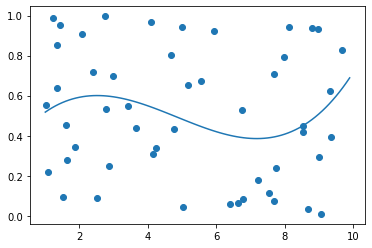

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

x = np.random.uniform(1, 10, 50)
y = np.random.uniform(0, 1, 50)
plt.scatter(x, y)

f = Polynomial.fit(x, y, deg=3)
xx = np.arange(1, 10, 0.1)
plt.plot(xx, f(xx))

<IPython.core.display.Javascript object>


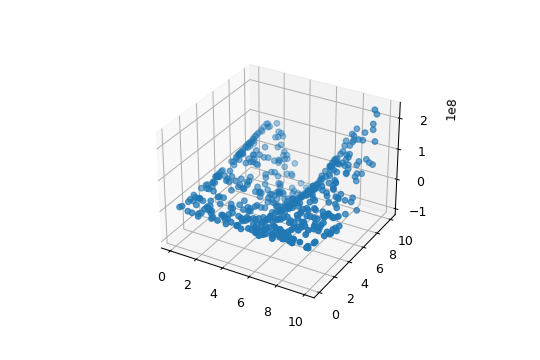

In [72]:
%matplotlib notebook
x, y = np.random.uniform(0, 10, size=(2, 500))
#y = np.random.uniform(0, 10, 50)
#xx, yy = np.meshgrid(x, y)

@np.vectorize
def f(x, y):
    return 10000000*y*np.sin(x) + np.exp(x + y)

#print(xx)
#zz = np.random.uniform(0, 1, size=(50, 50))
zz = f(x, y)

#plt.pcolor(xx, yy, zz)
ax = plt.subplot(111, projection='3d')
ax.scatter3D(x, y, zz)

In [73]:
points = np.array([x, y])
points

array([[7.16689431, 3.54760834, 5.85060816, 9.53695817, 2.69360821,
        0.10402755, 2.98846318, 4.9821057 , 8.07612541, 1.02088693,
        4.39262586, 2.45882793, 6.76137846, 7.61314234, 7.46384318,
        9.02385409, 2.45132788, 6.05842441, 9.18809658, 1.27167853,
        0.76952598, 9.84975724, 9.35748753, 0.55144413, 8.72446813,
        7.97901696, 4.73650354, 3.77240024, 0.23681724, 3.34012976,
        1.84352066, 2.48040217, 7.88335322, 0.55580373, 2.19254532,
        1.8319772 , 2.82592907, 6.31090566, 3.36844614, 2.34587116,
        8.92285643, 5.75391847, 5.33175933, 4.00780645, 0.02976034,
        2.15694496, 2.37667664, 7.60212857, 2.30962472, 2.58060906,
        6.60477242, 6.40154935, 4.36012263, 4.7905887 , 8.75361607,
        4.24686008, 5.66575184, 5.47897079, 8.26031279, 3.74540582,
        1.0569194 , 7.76580776, 3.59839091, 4.55495496, 4.28981511,
        1.05274471, 4.79369175, 3.4721288 , 2.29290337, 4.48760663,
        4.87312624, 8.10280775, 3.07877973, 6.98

In [77]:
Polynomial.fit([[1, 2, 3], [4, 5, 6]], [7, 8, 9], deg=4)

ValueError: Coefficient array is not 1-d

In [74]:
f = Polynomial.fit(points, zz, deg=3)
xg = np.arange(0, 10, 0.1)
yg = np.arange(0, 10, 0.1)
gg = np.meshgrid(xg, yg)

plt.scatter3D(gg, f(gg))

ValueError: Coefficient array is not 1-d